In [291]:
import pandas as pd 
import numpy as np

excel_file = pd.ExcelFile("./data/dfa_analysis_data.xlsx")

# Print the sheet names
sheet_names = excel_file.sheet_names
sheet_names

['descriptions', 'factors', 'portfolios (total returns)']

In [292]:
df = pd.read_excel("./data/dfa_analysis_data.xlsx", sheet_name="factors")
df = df.set_index("Date")
df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2024-04-30,-0.0467,-0.0239,-0.0052,0.0047
2024-05-31,0.0434,0.0078,-0.0166,0.0044
2024-06-30,0.0277,-0.0306,-0.0331,0.0041


In [293]:
rf = df['RF']
mkt = df['Mkt-RF']
df = df.drop(columns = ['RF'])
time_sample_1 = df.loc[:'1980',]
time_sample_2 = df.loc['1981':'2001', ]
time_sample_3 = df.loc['2002':, ]

portfolio_metrics_basic(df, 0.05, 12)

,Annnualized Return,Annnualized Vol,Annnualized SR,VaR(0.05)
Mkt-RF,0.082236,0.18471,0.445216,-0.079310
SMB,0.021225,0.11004,0.192886,-0.042205
HML,0.041237,0.12357,0.333713,-0.042100


In [294]:
def portfolio_metrics_basic(returns: pd.DataFrame, quantile:float, annualization_factor: float) -> pd.DataFrame: 
    '''
    Returns Annualized ER, Vol, SR, 
    '''
    
    returns_df = pd.DataFrame(index = returns.columns) 
    mu = returns.mean() * annualization_factor
    vol = returns.std() * np.sqrt(annualization_factor)
    sr = mu / vol

    quantile_returns = returns.quantile(quantile)

    
    returns_df['Annnualized Return'] = mu.values 
    returns_df['Annnualized Vol'] = vol.values 
    returns_df['Annnualized SR'] = sr.values
    returns_df['VaR(0.05)'] = quantile_returns
    
    return returns_df

time_samples = [time_sample_1, time_sample_2, time_sample_3]
for time_sample in time_samples:
    print(portfolio_metrics_basic(time_sample, 0.05, 12))
    print('-----')

        Annnualized Return  Annnualized Vol  Annnualized SR  VaR(0.05)
Mkt-RF            0.081138         0.205050        0.395696  -0.083985
SMB               0.033985         0.114568        0.296638  -0.043400
HML               0.049479         0.133825        0.369727  -0.042910
-----
        Annnualized Return  Annnualized Vol  Annnualized SR  VaR(0.05)
Mkt-RF            0.077257         0.157396        0.490847  -0.064545
SMB              -0.000862         0.118346       -0.007283  -0.046515
HML               0.063776         0.111183        0.573612  -0.041790
-----
        Annnualized Return  Annnualized Vol  Annnualized SR  VaR(0.05)
Mkt-RF            0.089488         0.154644        0.578674  -0.078735
SMB               0.011007         0.088944        0.123757  -0.039070
HML               0.000538         0.107348        0.005014  -0.041245
-----


- Yes, but SMB did not between 1981 and 2001. 
- yes, it got smaller and declined to near 0 in the same period. Possibly attributed to the size premia related to the market beta factor
-  yes, declined following the tech bubble burst in 2001

MIN Correlation pair is ('SMB', 'HML'), with a correlation of 0.1207736830392737
MAX Correlation pair is ('SMB', 'Mkt-RF'), with a correlation of 0.31470968049737796


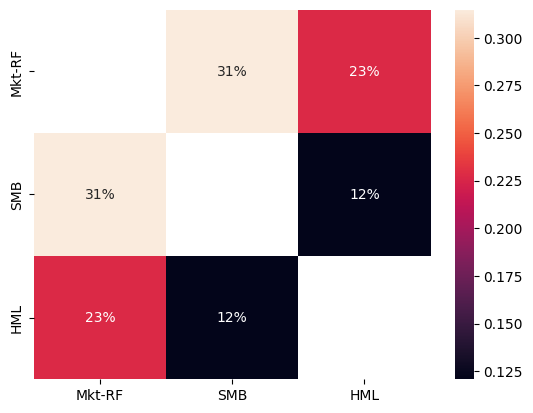

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# full_df = pd.concat([spy.set_index('Date'), df], axis = 1)

def plot_corr(data: pd.DataFrame):
    corr_mtx = data.corr() 
    corr_mtx[corr_mtx==1] = None
    sns.heatmap(corr_mtx,annot=True,fmt='.0%');

    corr_rank = corr_mtx.unstack().sort_values().dropna()
    pair_max = corr_rank.index[-1]
    pair_min = corr_rank.index[0]

    min_corr_value = corr_rank.iloc[0]
    max_corr_value = corr_rank.iloc[-1]
    
    print(f'MIN Correlation pair is {pair_min}, with a correlation of {min_corr_value}')
    print(f'MAX Correlation pair is {pair_max}, with a correlation of {max_corr_value}')
    
plot_corr(df)

MIN Correlation pair is ('SMB', 'HML'), with a correlation of 0.3091334172562327
MAX Correlation pair is ('HML', 'Mkt-RF'), with a correlation of 0.4378482661740347
None


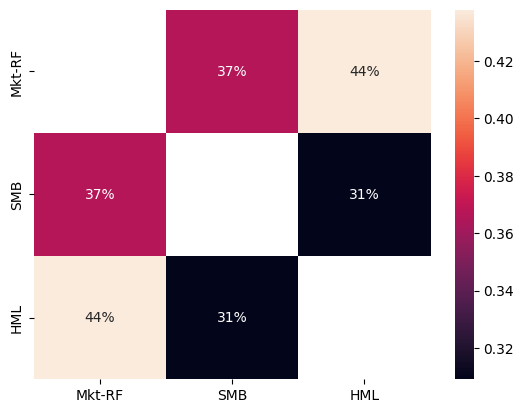

-----
MIN Correlation pair is ('Mkt-RF', 'HML'), with a correlation of -0.5272210294206209
MAX Correlation pair is ('SMB', 'Mkt-RF'), with a correlation of 0.16426406873998825
None


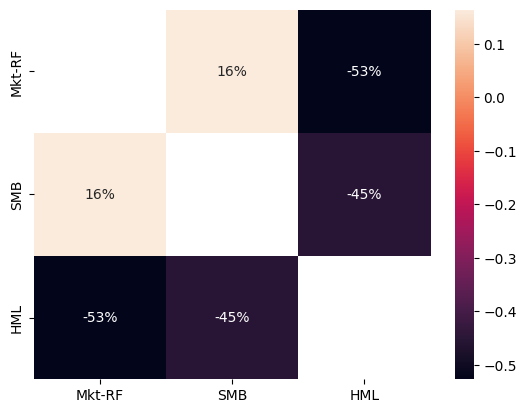

-----
MIN Correlation pair is ('Mkt-RF', 'HML'), with a correlation of 0.12778242585534993
MAX Correlation pair is ('SMB', 'Mkt-RF'), with a correlation of 0.3063094312141418
None


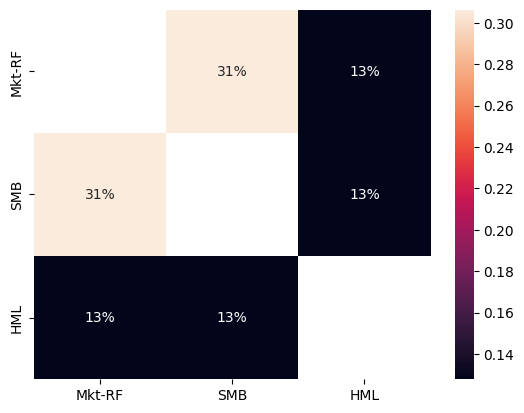

-----


In [296]:
for time_sample in time_samples:
    print(plot_corr(time_sample))
    plt.show()
    print('-----')

(<Axes: xlabel='Date'>, <Axes: xlabel='Date'>, <Axes: xlabel='Date'>)

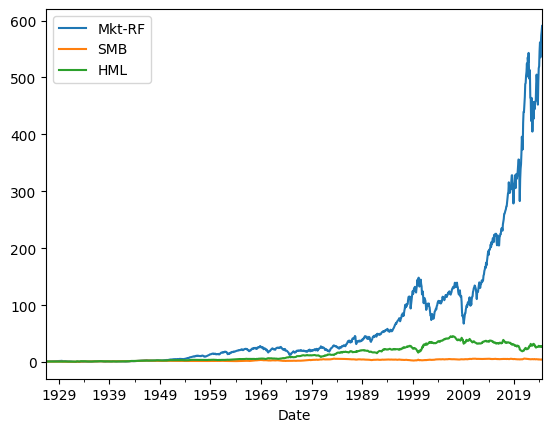

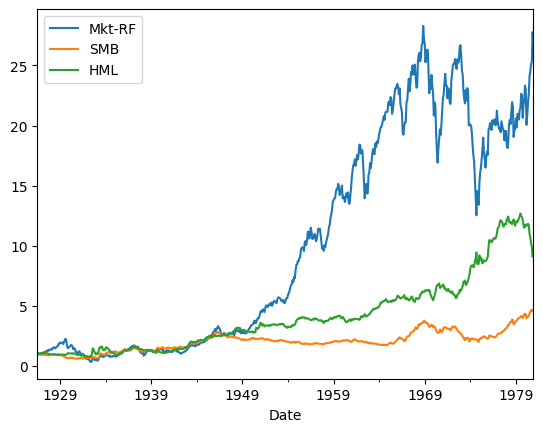

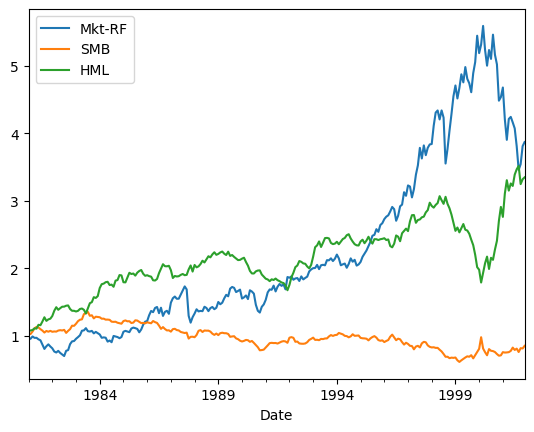

In [297]:
(df+1).cumprod().plot(), (time_sample_1+1).cumprod().plot(), (time_sample_2+1).cumprod().plot()

In [298]:
df = pd.read_excel("./data/dfa_analysis_data.xlsx", sheet_name="portfolios (total returns)")
df = df.set_index("Date")
df.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058248,-0.017006,0.004875,-0.014580,0.020534,0.012077,0.024192,0.004926,-0.026049,-0.003344,...,0.015893,0.015278,0.012978,0.002727,0.024678,0.034539,0.060902,0.020266,0.031111,0.005623
1926-08-31,-0.020206,-0.080282,0.013796,0.014606,0.083968,0.023618,-0.011849,0.040084,0.005038,0.061675,...,0.013336,0.038730,0.020021,0.021706,0.053422,0.010124,0.041903,0.020131,0.054849,0.077576
1926-09-30,-0.048291,-0.026154,-0.043417,-0.032729,0.008649,-0.026540,-0.012618,0.010829,-0.035480,-0.009401,...,0.010923,-0.005250,-0.017636,0.014646,0.008730,-0.012906,0.036538,0.000950,-0.007487,-0.024284
1926-10-31,-0.093729,-0.035519,-0.034948,0.034413,-0.025476,-0.028069,-0.032663,-0.050745,-0.080191,-0.013213,...,-0.033361,-0.026559,-0.021070,-0.031051,-0.053525,-0.027413,-0.030071,-0.022437,-0.046719,-0.058129
1926-11-30,0.055888,0.041877,0.024623,-0.044494,0.005362,0.031033,-0.023690,0.030078,0.051546,0.027292,...,0.034448,0.023887,0.037335,0.049320,0.018213,0.042946,0.025326,0.015204,0.036619,0.025636


In [299]:
df = pd.merge(df, rf, on = df.index).rename(columns = {'key_0':'Date'})
df = df.set_index('Date')


In [300]:
df['RF'].head()

Date
1926-07-31    0.0022
1926-08-31    0.0025
1926-09-30    0.0023
1926-10-31    0.0032
1926-11-30    0.0031
Name: RF, dtype: float64

In [301]:
assets = list(df.columns)
df[assets] = df[assets].subtract(df['RF'], axis=0)
df.drop(columns = ['RF'], inplace=True)
df.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.056048,-0.019206,0.002675,-0.016780,0.018334,0.009877,0.021992,0.002726,-0.028249,-0.005544,...,0.013693,0.013078,0.010778,0.000527,0.022478,0.032339,0.058702,0.018066,0.028911,0.003423
1926-08-31,-0.022706,-0.082782,0.011296,0.012106,0.081468,0.021118,-0.014349,0.037584,0.002538,0.059175,...,0.010836,0.036230,0.017521,0.019206,0.050922,0.007624,0.039403,0.017631,0.052349,0.075076
1926-09-30,-0.050591,-0.028454,-0.045717,-0.035029,0.006349,-0.028840,-0.014918,0.008529,-0.037780,-0.011701,...,0.008623,-0.007550,-0.019936,0.012346,0.006430,-0.015206,0.034238,-0.001350,-0.009787,-0.026584
1926-10-31,-0.096929,-0.038719,-0.038148,0.031213,-0.028676,-0.031269,-0.035863,-0.053945,-0.083391,-0.016413,...,-0.036561,-0.029759,-0.024270,-0.034251,-0.056725,-0.030613,-0.033271,-0.025637,-0.049919,-0.061329
1926-11-30,0.052788,0.038777,0.021523,-0.047594,0.002262,0.027933,-0.026790,0.026978,0.048446,0.024192,...,0.031348,0.020787,0.034235,0.046220,0.015113,0.039846,0.022226,0.012104,0.033519,0.022536


In [302]:
metrics = portfolio_metrics_basic(df, 0.05, 12)
metrics

,Annnualized Return,Annnualized Vol,Annnualized SR,VaR(0.05)
SMALL LoBM,0.067256,0.414855,0.162120,-0.143356
ME1 BM2,0.080831,0.335546,0.240893,-0.126175
ME1 BM3,0.120606,0.317920,0.379359,-0.104551
ME1 BM4,0.136977,0.285995,0.478948,-0.102151
SMALL HiBM,0.161024,0.319488,0.504007,-0.114089
ME2 BM1,0.076180,0.275894,0.276122,-0.112195
ME2 BM2,0.112310,0.258762,0.434030,-0.097824
ME2 BM3,0.115804,0.249734,0.463710,-0.093545
ME2 BM4,0.124316,0.255244,0.487049,-0.094593
ME2 BM5,0.149232,0.300306,0.496935,-0.112930


MIN Correlation pair is ('Annnualized Vol', 'VaR(0.05)'), with a correlation of -0.9603023430755752
MAX Correlation pair is ('Annnualized Vol', 'Annnualized Return'), with a correlation of 0.2165939951359143


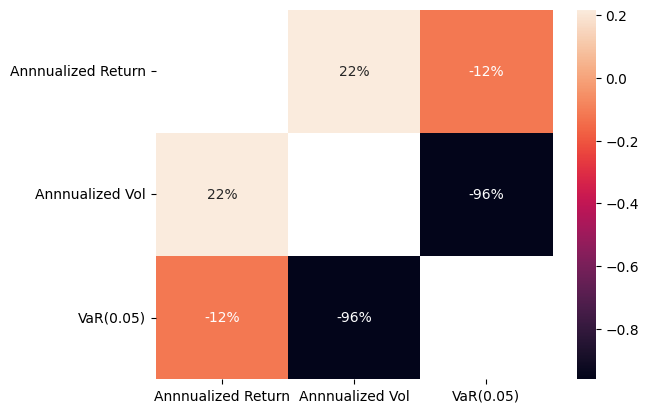

In [303]:
plot_corr(metrics[['Annnualized Return', 'Annnualized Vol', 'VaR(0.05)']])

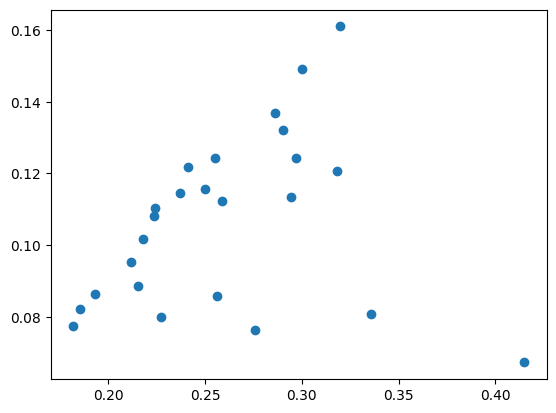

In [304]:
plt.scatter(y=metrics['Annnualized Return'], x=metrics['Annnualized Vol'])


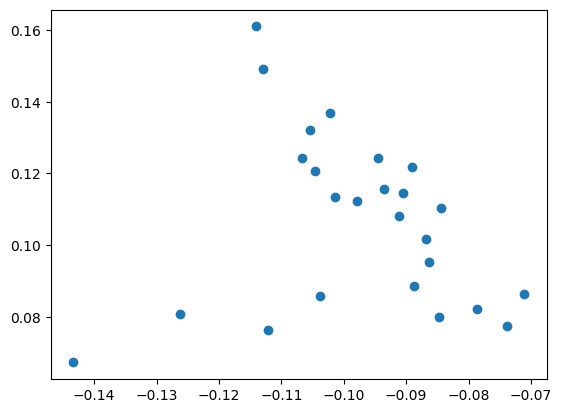

In [305]:
plt.scatter(y=metrics['Annnualized Return'], x=metrics['VaR(0.05)'])


In [306]:
import statsmodels.api as sm 
assets = list(df.columns)
df = pd.merge(df, mkt, on = df.index).rename(columns = {'key_0':'Date'})
df = df.set_index('Date')

In [307]:
df = df.loc['1981':]
df

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.054941,-0.014888,0.009909,0.005911,0.021085,-0.059733,-0.010738,-0.012684,0.007626,0.020623,...,-0.044926,-0.012942,-0.005534,0.003924,-0.071746,-0.083592,-0.074265,-0.010037,0.009464,-0.0504
1981-02-28,-0.044745,-0.010535,0.001444,0.009240,0.014398,-0.014473,0.005102,0.017420,0.024361,0.027939,...,0.014707,0.034695,0.002673,0.027240,0.021950,0.009415,-0.016450,0.020446,-0.016853,0.0057
1981-03-31,0.060718,0.082395,0.073568,0.077655,0.061040,0.068082,0.071500,0.066319,0.066325,0.063175,...,0.055672,0.073222,0.061934,0.064868,0.017353,0.019940,-0.008875,0.022230,0.069573,0.0356
1981-04-30,0.018141,0.035914,0.024600,0.036523,0.044090,0.006012,0.024744,0.026586,0.026781,0.029442,...,-0.019081,-0.006016,-0.007801,0.006253,-0.038311,-0.053508,-0.038006,0.010439,-0.040374,-0.0211
1981-05-31,0.038153,0.037824,0.032399,0.013389,0.016837,0.050452,0.010304,0.016889,-0.008609,0.013558,...,0.010245,0.007640,-0.000759,0.021978,0.004288,-0.032791,-0.031355,0.026669,-0.005979,0.0011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,-0.130128,-0.076561,-0.079804,-0.079124,-0.080168,-0.072984,-0.087440,-0.068110,-0.060808,-0.073370,...,-0.068962,-0.064723,-0.073261,-0.062037,-0.044696,0.007208,-0.049422,-0.054638,-0.059445,-0.0467
2024-05-31,0.067929,0.028121,0.044908,0.031166,0.043491,0.041575,0.027868,0.050656,0.044027,0.046318,...,0.017390,0.019487,0.048526,0.031667,0.055412,0.037588,0.026122,0.036084,0.038259,0.0434
2024-06-30,-0.047089,-0.027302,-0.060055,-0.020509,-0.029688,-0.023300,-0.024891,-0.024715,-0.019464,-0.032911,...,-0.021718,-0.026953,-0.020711,-0.031647,0.057072,0.006973,-0.000874,-0.020792,0.002003,0.0277


In [308]:
rf = df['Mkt-RF'] 
df.drop(columns = ['Mkt-RF'], inplace=True) 

In [309]:
annualization_factor = 12 

def time_series_regression(portfolio, factors, FF3F=False, resid=False):
    ff_report = pd.DataFrame(index=portfolio.columns)
    bm_residuals = pd.DataFrame(columns=portfolio.columns)

    x = sm.add_constant(factors)
    for portf in portfolio.columns:
        y = portfolio[portf]
        res = sm.OLS(y, x).fit()
        ff_report.loc[portf, 'alpha'] = res.params['const'] * annualization_factor
        ff_report.loc[portf, 'beta'] = res.params[1]
        
        if FF3F:
            ff_report.loc[portf, 'Size beta'] = res.params[2]
            ff_report.loc[portf, 'Value beta'] = res.params[3]

        ff_report.loc[portf, 'info_ratio'] = np.sqrt(annualization_factor) * res.params['const'] / res.resid.std()
        ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]
        ff_report.loc[portf, 'R-squared'] = res.rsquared
        ff_report.loc[portf, 'Tracking Error'] = res.resid.std() * np.sqrt(annualization_factor)

        # Calculate the MAE
        mae = np.mean(np.abs(res.resid))
        ff_report.loc[portf, 'MAE'] = mae

        if resid:
            bm_residuals[portf] = res.resid
    if resid:
        return bm_residuals
    return ff_report
# df = df.set_index('Date')
capm_df = time_series_regression(df, rf)
# capm_df = time_series_regression(df, df['Mkt-RF'])


/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

In [310]:
capm_df.round(4)

,alpha,beta,info_ratio,treynor_ratio,R-squared,Tracking Error,MAE
SMALL LoBM,-0.1067,1.3564,-0.6134,0.0049,0.5961,0.1740,0.0352
ME1 BM2,-0.0088,1.1657,-0.0580,0.0761,0.5905,0.1513,0.0299
ME1 BM3,0.0046,1.0452,0.0391,0.0880,0.6550,0.1182,0.0257
ME1 BM4,0.0347,0.9725,0.2854,0.1193,0.6085,0.1216,0.0252
SMALL HiBM,0.0447,0.9950,0.3151,0.1285,0.5450,0.1417,0.0282
ME2 BM1,-0.0530,1.3386,-0.4119,0.0440,0.7240,0.1288,0.0279
ME2 BM2,0.0056,1.1349,0.0538,0.0886,0.7405,0.1047,0.0228
ME2 BM3,0.0199,1.0286,0.2124,0.1030,0.7445,0.0939,0.0207
ME2 BM4,0.0273,0.9747,0.2722,0.1117,0.6957,0.1004,0.0218
ME2 BM5,0.0228,1.1144,0.1786,0.1041,0.6487,0.1278,0.0271


If the CAPM were true, alpha should be 0. MAE should be 0 and info ratio should be 0 Trenor ratio should be teh same across.

Consistency in Risk Premium: If the CAPM holds, assets with higher beta should offer higher expected returns (commensurate with the additional risk). The Treynor Ratio, which measures excess return per unit of beta, would thus be consistent across assets or portfolios if they are priced according to CAPM. In other words, for an efficiently priced portfolio under CAPM assumptions, the Treynor Ratio should theoretically equal the market's expected excess return over the risk-free rate.

In [311]:
y = df.mean()
time_series_regression(y.to_frame('Mean of excess returns'), capm_df['beta'])

/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]


,alpha,beta,info_ratio,treynor_ratio,R-squared,Tracking Error,MAE
Mean of excess returns,0.208623,-0.009015,35.404667,-10.4114,0.300557,0.005893,0.001227


In [312]:
import numpy as np 

# returns is the main returns not annualized 
def tangency_weights(returns,dropna=True,scale_cov=1, name = 'Tangency'):
    if dropna:
        returns = returns.dropna()

    covmat_full = returns.cov()
    covmat_diag = np.diag(np.diag(covmat_full))
    covmat = scale_cov * covmat_full + (1-scale_cov) * covmat_diag

    weights = np.linalg.solve(covmat,returns.mean())
    weights = weights / weights.sum()
    tangency_weights_df = pd.DataFrame(weights, index=returns.columns, columns=[f'{name} Weights'])

    return tangency_weights_df

tan_weights = tangency_weights(df) 

In [313]:
def portfolio_returns_calc(data, weights_df): 
    return pd.DataFrame(data @ (weights_df.values)) 
rets = portfolio_returns_calc(df, tan_weights).rename(columns = {0: "expected tan returns"})
rets

,expected tan returns
Date,
1981-01-31,0.044056
1981-02-28,0.055052
1981-03-31,0.113298
1981-04-30,0.013588
1981-05-31,-0.028835
...,...
2024-04-30,0.025892
2024-05-31,-0.031765
2024-06-30,0.092400


In [314]:
mv_capm = time_series_regression(df, rets)


/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

In [315]:
mv_capm

,alpha,beta,info_ratio,treynor_ratio,R-squared,Tracking Error,MAE
SMALL LoBM,8.743006e-16,0.017416,3.193831e-15,0.383026,0.000174,0.273747,0.058802
ME1 BM2,6.140921e-16,0.231549,2.653013e-15,0.383026,0.041297,0.231470,0.049169
ME1 BM3,4.527628e-16,0.240209,2.322063e-15,0.383026,0.061325,0.194983,0.042196
ME1 BM4,7.650131e-16,0.302847,4.161572e-15,0.383026,0.104610,0.183828,0.038733
SMALL HiBM,5.672546e-16,0.333758,2.860682e-15,0.383026,0.108695,0.198293,0.040815
ME2 BM1,7.051651e-16,0.153692,2.901042e-15,0.383026,0.016918,0.243073,0.053825
ME2 BM2,1.275022e-16,0.262425,6.433480e-16,0.383026,0.070178,0.198185,0.043537
ME2 BM3,7.936360e-17,0.276604,4.491668e-16,0.383026,0.095427,0.176691,0.038401
ME2 BM4,2.888315e-16,0.284144,1.676413e-15,0.383026,0.104810,0.172291,0.037345
ME2 BM5,2.771221e-16,0.302836,1.343571e-15,0.383026,0.084917,0.206258,0.043501


In [316]:
factors = pd.read_excel("./data/dfa_analysis_data.xlsx", sheet_name="factors")
factors = factors.set_index("Date")
factors = factors.drop(columns = ['RF']).loc['1981':]
factors

,Mkt-RF,SMB,HML
Date,,,
1981-01-31,-0.0504,0.0292,0.0672
1981-02-28,0.0057,-0.0034,0.0102
1981-03-31,0.0356,0.0354,0.0064
1981-04-30,-0.0211,0.0440,0.0228
1981-05-31,0.0011,0.0200,-0.0042
...,...,...,...
2024-04-30,-0.0467,-0.0239,-0.0052
2024-05-31,0.0434,0.0078,-0.0166
2024-06-30,0.0277,-0.0306,-0.0331


In [317]:
df

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.054941,-0.014888,0.009909,0.005911,0.021085,-0.059733,-0.010738,-0.012684,0.007626,0.020623,...,-0.077022,-0.044926,-0.012942,-0.005534,0.003924,-0.071746,-0.083592,-0.074265,-0.010037,0.009464
1981-02-28,-0.044745,-0.010535,0.001444,0.009240,0.014398,-0.014473,0.005102,0.017420,0.024361,0.027939,...,0.002600,0.014707,0.034695,0.002673,0.027240,0.021950,0.009415,-0.016450,0.020446,-0.016853
1981-03-31,0.060718,0.082395,0.073568,0.077655,0.061040,0.068082,0.071500,0.066319,0.066325,0.063175,...,0.080443,0.055672,0.073222,0.061934,0.064868,0.017353,0.019940,-0.008875,0.022230,0.069573
1981-04-30,0.018141,0.035914,0.024600,0.036523,0.044090,0.006012,0.024744,0.026586,0.026781,0.029442,...,-0.010849,-0.019081,-0.006016,-0.007801,0.006253,-0.038311,-0.053508,-0.038006,0.010439,-0.040374
1981-05-31,0.038153,0.037824,0.032399,0.013389,0.016837,0.050452,0.010304,0.016889,-0.008609,0.013558,...,0.023970,0.010245,0.007640,-0.000759,0.021978,0.004288,-0.032791,-0.031355,0.026669,-0.005979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,-0.130128,-0.076561,-0.079804,-0.079124,-0.080168,-0.072984,-0.087440,-0.068110,-0.060808,-0.073370,...,-0.061889,-0.068962,-0.064723,-0.073261,-0.062037,-0.044696,0.007208,-0.049422,-0.054638,-0.059445
2024-05-31,0.067929,0.028121,0.044908,0.031166,0.043491,0.041575,0.027868,0.050656,0.044027,0.046318,...,0.021254,0.017390,0.019487,0.048526,0.031667,0.055412,0.037588,0.026122,0.036084,0.038259
2024-06-30,-0.047089,-0.027302,-0.060055,-0.020509,-0.029688,-0.023300,-0.024891,-0.024715,-0.019464,-0.032911,...,-0.010171,-0.021718,-0.026953,-0.020711,-0.031647,0.057072,0.006973,-0.000874,-0.020792,0.002003


In [320]:
ff3 = time_series_regression(df, factors, True)


/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'Size beta'] = res.params[2]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_943/1862475875.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

In [321]:
ff3

,alpha,beta,Size beta,Value beta,info_ratio,treynor_ratio,R-squared,Tracking Error,MAE
SMALL LoBM,-0.085811,1.111846,1.392517,-0.253788,-0.937530,0.006000,0.888226,0.091529,0.019438
ME1 BM2,0.001435,0.965456,1.317675,-0.014432,0.020344,0.091863,0.910924,0.070556,0.015046
ME1 BM3,0.000595,0.923142,1.065113,0.277445,0.011988,0.099666,0.939265,0.049597,0.010855
ME1 BM4,0.022184,0.877818,1.065753,0.477399,0.467283,0.132144,0.940281,0.047474,0.010394
SMALL HiBM,0.023053,0.929787,1.066006,0.691417,0.312014,0.137492,0.876254,0.073886,0.012320
ME2 BM1,-0.032422,1.141897,1.023281,-0.310250,-0.539477,0.051553,0.939904,0.060099,0.012918
ME2 BM2,0.007150,1.013778,0.915858,0.121287,0.141210,0.099149,0.939304,0.050635,0.010995
ME2 BM3,0.008658,0.973977,0.719244,0.389224,0.165561,0.108777,0.920763,0.052295,0.010945
ME2 BM4,0.008373,0.941288,0.748332,0.575080,0.186100,0.115623,0.938957,0.044991,0.009883
ME2 BM5,-0.005771,1.089194,0.929779,0.832768,-0.124297,0.106495,0.953637,0.046426,0.009997
